In [169]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [170]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
gende_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [171]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [172]:
gende_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [173]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


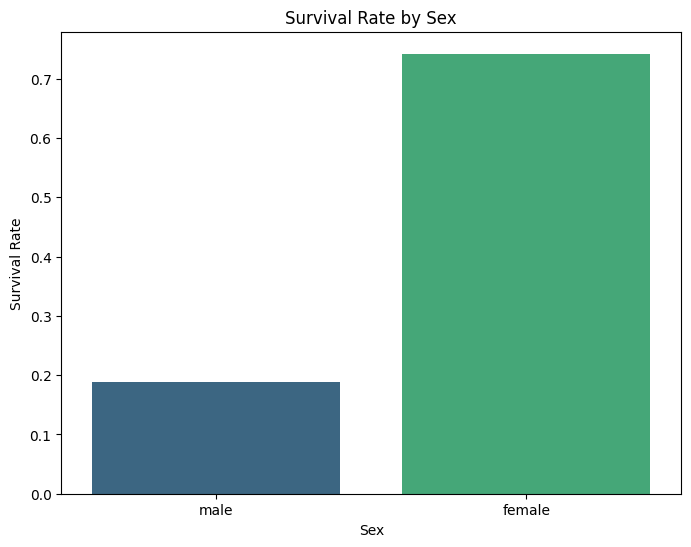

In [174]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

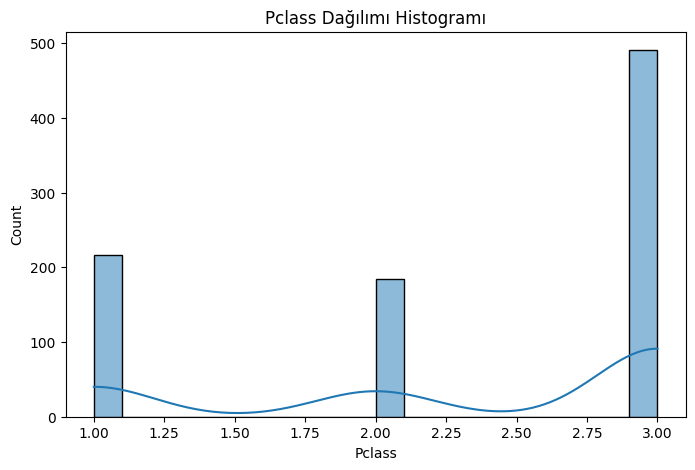

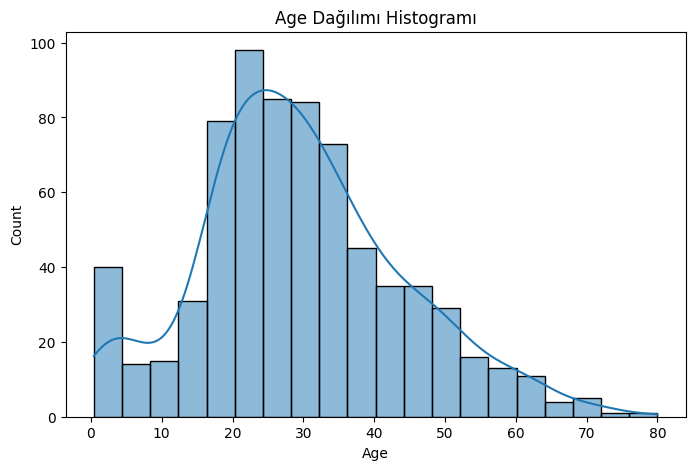

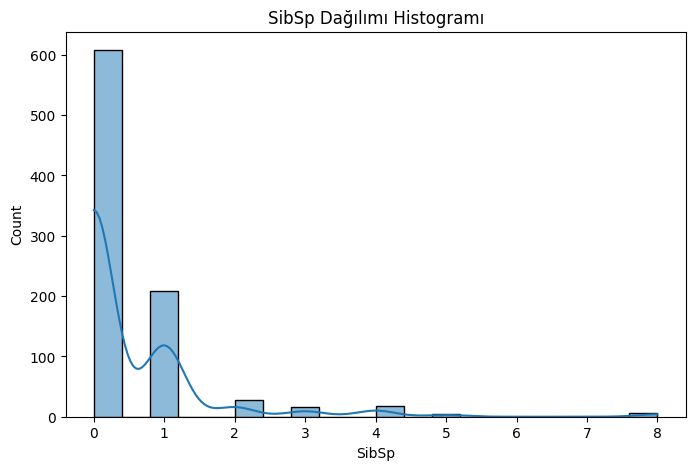

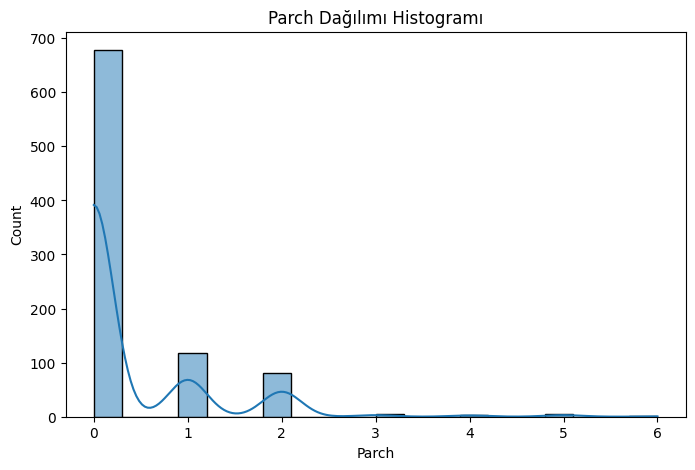

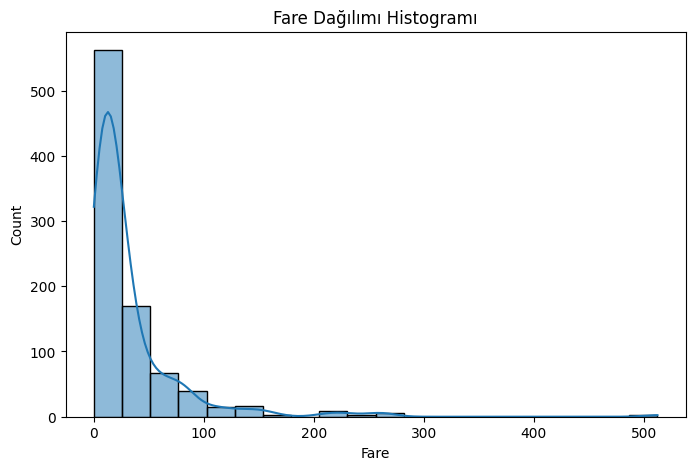

In [175]:
for sutun in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[sutun], bins=20, kde=True)
    plt.xlabel(sutun)
    plt.title(f'{sutun} Dağılımı Histogramı')
    plt.show()

In [176]:
numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

corr = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()
corr

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.00,-0.37,0.08,0.02,-0.55,-0.34
Age,-0.37,1.00,-0.31,-0.19,0.10,-0.08
SibSp,0.08,-0.31,1.00,0.41,0.16,-0.04
Parch,0.02,-0.19,0.41,1.00,0.22,0.08
Fare,-0.55,0.10,0.16,0.22,1.00,0.26
Survived,-0.34,-0.08,-0.04,0.08,0.26,1.00


In [177]:
live_famale = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')].shape[0]
number_of_famale = train_df[(train_df['Sex'] == 'female')].shape[0]
number_of_male = train_df[(train_df['Sex'] == 'male')].shape[0]
live_male = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')].shape[0]

per_live_famale = live_famale / number_of_famale
per_live_male = live_male / number_of_male

print(live_famale/ number_of_famale, live_male/ number_of_male)

0.7420382165605095 0.18890814558058924


In [178]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
train_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [180]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [181]:
test_df[test_df['Pclass'] == 3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50,0,0,7.83,Q
1,893,3,female,47.00,1,0,7.00,S
3,895,3,male,27.00,0,0,8.66,S
4,896,3,female,22.00,1,1,12.29,S
5,897,3,male,14.00,0,0,9.22,S
...,...,...,...,...,...,...,...,...
412,1304,3,female,28.00,0,0,7.78,S
413,1305,3,male,NaN,0,0,8.05,S
415,1307,3,male,38.50,0,0,7.25,S
416,1308,3,male,NaN,0,0,8.05,S


In [182]:
male_mean = train_df[train_df['Sex'] == 'male']['Age'].mean()
female_mean = train_df[train_df['Sex'] == 'female']['Age'].mean()
print(male_mean, female_mean)

30.72664459161148 27.915708812260537


In [183]:
male_mean_t = test_df[test_df['Sex'] == 'male']['Age'].mean()
female_mean_t = test_df[test_df['Sex'] == 'female']['Age'].mean()

fare_3_mean = test_df[test_df['Pclass'] == 3]['Fare'].mean()
print(fare_3_mean)

12.459677880184334


In [184]:
train_df.loc[(train_df['Sex'] == 'male') & (train_df['Age'].isna()), 'Age'] = male_mean
train_df.loc[(train_df['Sex'] == 'female') & (train_df['Age'].isna()), 'Age'] = female_mean

In [185]:
test_df.loc[(test_df['Sex'] == 'male') & (test_df['Age'].isna()), 'Age'] = male_mean_t
test_df.loc[(test_df['Sex'] == 'female') & (test_df['Age'].isna()), 'Age'] = female_mean_t

test_df.loc[(test_df['Pclass'] == 3) & (test_df['Fare'].isna()), 'Fare'] = fare_3_mean

In [186]:
train_df.dropna(subset=['Embarked'], inplace=True)
test_df.dropna(subset=['Embarked'], inplace=True)

In [187]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [188]:
gende_df[gende_df['Survived'] == 1].shape[0]

152

In [189]:
gende_df[gende_df['Survived'] == 0].shape[0]

266

In [190]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.00,1,0,7.25,S
1,2,1,1,female,38.00,1,0,71.28,C
2,3,1,3,female,26.00,0,0,7.92,S
3,4,1,1,female,35.00,1,0,53.10,S
4,5,0,3,male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.00,0,0,13.00,S
887,888,1,1,female,19.00,0,0,30.00,S
888,889,0,3,female,27.92,1,2,23.45,S
889,890,1,1,male,26.00,0,0,30.00,C


In [191]:
columns_to_encode = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

train_df_encoded = pd.get_dummies(train_df[columns_to_encode], drop_first=True)
test_df_encoded = pd.get_dummies(test_df[columns_to_encode], drop_first=True)

train_df = pd.concat([train_df.drop(columns=columns_to_encode), train_df_encoded], axis=1)
test_df = pd.concat([test_df.drop(columns=columns_to_encode), test_df_encoded], axis=1)



In [192]:
train_df

,PassengerId,Survived,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.00,7.25,3,1,0,True,False,True
1,2,1,38.00,71.28,1,1,0,False,False,False
2,3,1,26.00,7.92,3,0,0,False,False,True
3,4,1,35.00,53.10,1,1,0,False,False,True
4,5,0,35.00,8.05,3,0,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00,13.00,2,0,0,True,False,True
887,888,1,19.00,30.00,1,0,0,False,False,True
888,889,0,27.92,23.45,3,1,2,False,False,True
889,890,1,26.00,30.00,1,0,0,True,False,False


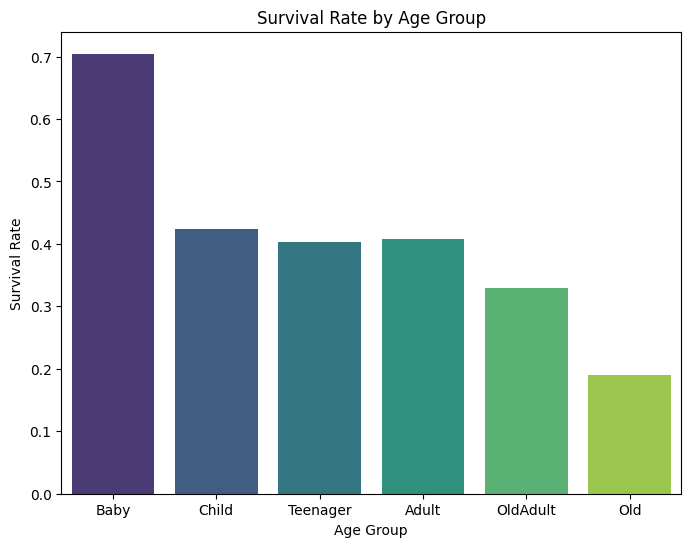

In [193]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = train_df.groupby('AgeGroup')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_df, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

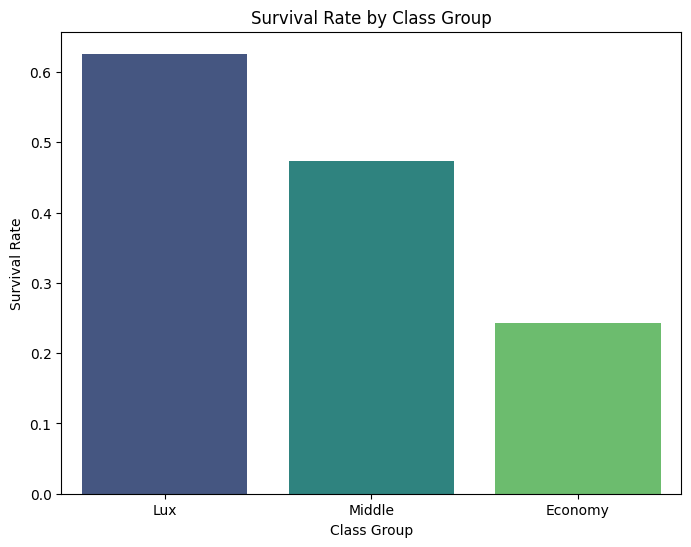

In [194]:
train_df['ClassGroup'] = pd.cut(train_df['Pclass'], bins=[0, 1, 2, 3], labels=['Lux', 'Middle', 'Economy'])
survival_by_class_group = train_df.groupby('ClassGroup')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='ClassGroup', y='Survived', data=train_df, ci=None, order=['Lux', 'Middle', 'Economy'], palette='viridis')
plt.title('Survival Rate by Class Group')
plt.ylabel('Survival Rate')
plt.xlabel('Class Group')
plt.show()

In [195]:
train_df

,PassengerId,Survived,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,AgeGroup,ClassGroup
0,1,0,22.00,7.25,3,1,0,True,False,True,Adult,Economy
1,2,1,38.00,71.28,1,1,0,False,False,False,OldAdult,Lux
2,3,1,26.00,7.92,3,0,0,False,False,True,Adult,Economy
3,4,1,35.00,53.10,1,1,0,False,False,True,OldAdult,Lux
4,5,0,35.00,8.05,3,0,0,True,False,True,OldAdult,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00,13.00,2,0,0,True,False,True,Adult,Middle
887,888,1,19.00,30.00,1,0,0,False,False,True,Adult,Lux
888,889,0,27.92,23.45,3,1,2,False,False,True,Adult,Economy
889,890,1,26.00,30.00,1,0,0,True,False,False,Adult,Lux


In [196]:
test_df

,PassengerId,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,892,34.50,7.83,3,0,0,True,True,False
1,893,47.00,7.00,3,1,0,False,False,True
2,894,62.00,9.69,2,0,0,True,True,False
3,895,27.00,8.66,3,0,0,True,False,True
4,896,22.00,12.29,3,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,30.27,8.05,3,0,0,True,False,True
414,1306,39.00,108.90,1,0,0,False,False,False
415,1307,38.50,7.25,3,0,0,True,False,True
416,1308,30.27,8.05,3,0,0,True,False,True


In [197]:
corr = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male','Embarked_Q', 'Embarked_S', 'Survived']].corr()
corr

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
Pclass,1.00,-0.33,0.08,0.02,-0.55,0.13,0.22,0.08,-0.34
Age,-0.33,1.00,-0.24,-0.18,0.09,0.11,-0.02,-0.02,-0.09
SibSp,0.08,-0.24,1.00,0.41,0.16,-0.12,-0.03,0.07,-0.03
Parch,0.02,-0.18,0.41,1.00,0.22,-0.25,-0.08,0.06,0.08
Fare,-0.55,0.09,0.16,0.22,1.00,-0.18,-0.12,-0.16,0.26
Sex_male,0.13,0.11,-0.12,-0.25,-0.18,1.00,-0.08,0.12,-0.54
Embarked_Q,0.22,-0.02,-0.03,-0.08,-0.12,-0.08,1.00,-0.50,0.00
Embarked_S,0.08,-0.02,0.07,0.06,-0.16,0.12,-0.50,1.00,-0.15
Survived,-0.34,-0.09,-0.03,0.08,0.26,-0.54,0.00,-0.15,1.00


In [198]:
X_train = train_df.drop(columns=['Survived', 'AgeGroup', 'ClassGroup'])
y_train = train_df['Survived']

In [199]:
X_test = test_df
y_test = gende_df['Survived']

In [200]:
# !pip install lazypredict
# from lazypredict.Supervised import LazyClassifier


# # models, tahmin = reg.fit(x_train, x_test, y_train, y_test)
# clf = LazyClassifier()


# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# models

In [201]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model_optuna = RandomForestClassifier(n_estimators=169, max_depth=29, min_samples_split=12, min_samples_leaf=2)

model.fit(X_train,y_train)
model_optuna.fit(X_train,y_train)

predictions = model.predict(X_test)
predictions_optuna = model_optuna.predict(X_test)

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


conf_matrix = confusion_matrix(y_test, predictions)
print('Karışıklık Matrisi:\n', conf_matrix)

accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy:.10f}')

# Hesaplama yapılırken pozitif ve negatif değerlerin her iksisi de göz önüne alınır.
precision = precision_score(y_test, predictions, average='weighted')
print(f'Precision: {precision:.10f}')


recall = recall_score(y_test, predictions, average='weighted')
print(f'Geri Çağırma: {recall:.10f}')

# F1 skoru
f1 = f1_score(y_test, predictions, average='weighted')
print(f'F1 Skoru: {f1:.10f}')

print("------------------------------")
print("-----------OPTUNA-------------")


conf_matrix = confusion_matrix(y_test, predictions_optuna)
print('Karışıklık Matrisi:\n', conf_matrix)

accuracy = accuracy_score(y_test, predictions_optuna)

print(f'Accuracy: {accuracy:.10f}')

# Hesaplama yapılırken pozitif ve negatif değerlerin her iksisi de göz önüne alınır.
precision = precision_score(y_test, predictions_optuna, average='weighted')
print(f'Precision: {precision:.10f}')


recall = recall_score(y_test, predictions_optuna, average='weighted')
print(f'Geri Çağırma: {recall:.10f}')

# F1 skoru
f1 = f1_score(y_test, predictions_optuna, average='weighted')
print(f'F1 Skoru: {f1:.10f}')

Karışıklık Matrisi:
 [[234  32]
 [ 56  96]]
Accuracy: 0.7894736842
Precision: 0.7862068966
Geri Çağırma: 0.7894736842
F1 Skoru: 0.7849948613
------------------------------
-----------OPTUNA-------------
Karışıklık Matrisi:
 [[238  28]
 [ 53  99]]
Accuracy: 0.8062200957
Precision: 0.8039269224
Geri Çağırma: 0.8062200957
F1 Skoru: 0.8018869415


In [203]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# # Doğruluk hesaplama
# accuracy = accuracy_score(y_test, predictions)
# print(f"Doğruluk: {accuracy:.2f}")

# # Karmaşıklık Matrisini hesaplama
# conf_matrix = confusion_matrix(y_test, predictions)
# print("Karmaşıklık Matrisi:")
# print(conf_matrix)

# # Karmaşıklık Matrisini görselleştirme
# plt.figure(figsize=(10,7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Negatif', 'Pozitif'], 
#             yticklabels=['Negatif', 'Pozitif'])
# plt.xlabel('Tahminler')
# plt.ylabel('Gerçekler')
# plt.title('Karmaşıklık Matrisi')
# plt.show()

# # Sınıflandırma raporunu hesaplama
# report = classification_report(y_test, predictions)
# print("Sınıflandırma Raporu:")
# print(report)

# # ROC AUC hesaplama (ikili sınıflama için)
# roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
# print(f"ROC AUC: {roc_auc:.2f}")

In [204]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# # Modeli oluşturun
# model_cv = RandomForestClassifier()

# # Çapraz doğrulama uygulayın
# scores = cross_val_score(model_cv, X_train, y_train, cv=5)  # cv=5 burada 5 katlı çapraz doğrulama anlamına gelir

# # Sonuçları yazdırın
# print(f"Çapraz Doğrulama Skorları: {scores}")
# print(f"Ortalama Skor: {scores.mean()}")

In [205]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the model
# model = RandomForestClassifier()

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30], 
#     'min_samples_split': [2, 5, 10], 
#     'min_samples_leaf': [1, 2, 4],  
#   }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, scoring='accuracy')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

In [206]:
# # Use the best model
# best_model = grid_search.best_estimator_

# # Make predictions
# predictions = best_model.predict(X_test)

# conf_matrix = confusion_matrix(y_test, predictions)
# print('Karışıklık Matrisi:\n', conf_matrix)

# accuracy = accuracy_score(y_test, predictions)

# print(f'Accuracy: {accuracy:.10f}')

# # Hesaplama yapılırken pozitif ve negatif değerlerin her iksisi de göz önüne alınır.
# precision = precision_score(y_test, predictions, average='weighted')
# print(f'Precision: {precision:.10f}')


# recall = recall_score(y_test, predictions, average='weighted')
# print(f'Geri Çağırma: {recall:.10f}')

# # F1 skoru
# f1 = f1_score(y_test, predictions, average='weighted')
# print(f'F1 Skoru: {f1:.10f}')

In [207]:
# import optuna
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split


# # Objective function for Optuna
# def objective(trial):
#     # Define the hyperparameters to tune
#     n_estimators = trial.suggest_int('n_estimators', 10, 200)
#     max_depth = trial.suggest_int('max_depth', 2, 32)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

#     # Create the RandomForest model with the hyperparameters
#     model = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=0
#     )

#     # Evaluate the model using cross-validation
#     score = cross_val_score(model, X_train, y_train, cv=3 , scoring='accuracy').mean()
#     return score

# # Create a study and optimize it
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# # Print the best hyperparameters
# print('Best hyperparameters:', study.best_params)

# Best hyperparameters: {'n_estimators': 169, 'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 2}

In [208]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20)
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_distributions, n_iter=50, cv=3)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

print(best_params)

# {'max_depth': 26, 'min_samples_split': 15, 'n_estimators': 585}

{'max_depth': 26, 'min_samples_split': 15, 'n_estimators': 585}


In [209]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

search_space = {
    'n_estimators': (100, 1000),
    'max_depth': (10, 50),
    'min_samples_split': (2, 20)
}

bayes_search = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=search_space, n_iter=50, cv=5)
bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_

print(best_params)

# OrderedDict([('max_depth', 35), ('min_samples_split', 15), ('n_estimators', 720)])

OrderedDict([('max_depth', 35), ('min_samples_split', 15), ('n_estimators', 720)])


In [210]:
# from hyperopt import fmin, tpe, hp, Trials
# from hyperopt.pyll.base import scope
# from sklearn.ensemble import RandomForestClassifier

# def objective(params):
#     clf = RandomForestClassifier(n_estimators=params['n_estimators'],
#                                  max_depth=params['max_depth'],
#                                  min_samples_split=params['min_samples_split'])
#     clf.fit(X_train, y_train)
#     accuracy = clf.score(X_test, y_test)
#     return -accuracy

# space = {
#     'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
#     'max_depth': hp.quniform('max_depth', 10, 50, 1),
#     'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1)
# }

# trials = Trials()
# best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# print(best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


InvalidParameterError: The 'max_depth' parameter of RandomForestClassifier must be an int in the range [1, inf) or None. Got 23.0 instead.